# Mobaka-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)
* [Appendix](#Appendix)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'MKA'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKA%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Obj.Gewicht) != ''))""".replace('\n',' ')
# Anzahl != '' damit fotografierte Gefäße nicht mit dabei ist
# Gewicht != '' da ObjID 2115 in BOO 87/101 nicht gewogen wurde

df = pd.read_sql(sql, con)
# display(df.head())

In [3]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,23,22.54902
GE,79,77.45098


In [4]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

In [5]:
a = pd.Series({'sicher':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'] == 'MKA']),
               'fraglich':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'].str.contains(' ')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,24,30.379747
sicher,55,69.620253


In [6]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
BOT/MKA (?)         2.0
BOT/MKA/MAT (?)     2.0
EPE/MKA (?)         2.0
MKA                59.0
MKA (?)            16.0
MKA/EPE (?)         3.0
PKM/MKA (?)         1.0
All                85.0
Name: objID, dtype: float64

In [7]:
df_pivot = df.pivot_table(values = 'Anzahl', index = ['ort_fluss', 'Ort'], aggfunc = np.sum, fill_value = '')
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl
ort_fluss     Ort                             
Likwala-Esobe Bojenjo (Fpl. 292)            11
              Bokuma (Fpl. 295)              2
              Boleko (Fpl. 285)             12
              Botwale (Fpl. 286)            14
              Bwanela (Fpl. 298)             1
              Ebambe (Fpl. 297)              2
              Ilebo (Fpl. 287)               1
              Itanga (Fpl. 305)              3
              Jeke (Fpl. 303)                3
              Lokolélé (Fpl. 290)            1
              Misongo (Fpl. 288)            12
              Ngombe (Fpl. 283)              2
              Yumba (Fpl. 289)              26
Sangha        Bondo-Mission (Fpl. 245)       1
              Ikelemba (Fpl. 260)            1
              Loboko (Fpl. 248)              1
              Matoto (Fpl. 264)              1
              Mobaka (Fpl. 246)              3
              Monjolomba (Fpl. 243)          1
              Sosolo (Fpl. 241)              2
Zaire/Kongo   Gombe (Fpl. 237)               2

In [8]:
df_pivot = df.pivot_table(values = ['Anzahl'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)

Anzahl Fundorte:

In [9]:
len(df_pivot.index)

25

Anzahl Stücke:

In [10]:
np.sum(df_pivot['Anzahl'])

102

Gewicht insgesamt in kg:

In [11]:
np.sum(df['Gewicht']) / 1000

12.78

### Scherbentypen

In [12]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,8,8.333333
R,76,79.166667
W,12,12.500000
B,0,0.000000


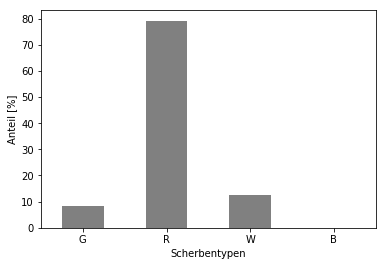

In [13]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Fotografierte Stücke

In [14]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Obj.Form_Gef,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKA%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) = ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,objID,ort_kurz,Ort,bef_nr,Form_Gef,Typ
0,1103,YUM,Yumba (Fpl. 289),87/102,None,MKA
1,1110,MIS,Misongo (Fpl. 288),87/101,F3,MKA


## Technologische Merkmale (*fabrics*)

In [15]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%MKA%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [16]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


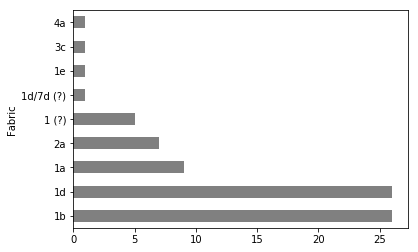

In [17]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [18]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1b,26,33.766234
1d,26,33.766234
1a,9,11.688312
2a,7,9.090909
1 (?),5,6.493506


In [19]:
a = pd.Series({'Typ 1':len(df.loc[df['Fabric'].str.contains("1")].index),
               'Rest':len(df.loc[~df['Fabric'].str.contains("1")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rest,9,12.162162
Typ 1,65,87.837838


In [20]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,50.0,69.444444
wenig,16.0,22.222222
mittel,6.0,8.333333
viel,NaN,NaN
sehr viel,NaN,NaN


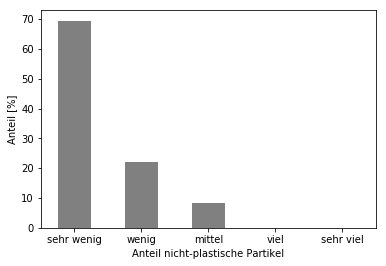

In [21]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [22]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,36.0,50.000000
F,15.0,20.833333
M,17.0,23.611111
C,4.0,5.555556
VC,NaN,NaN


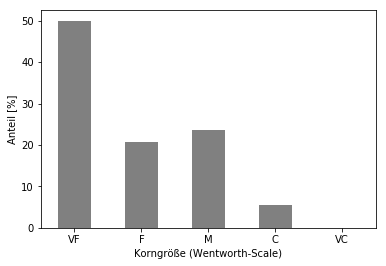

In [23]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [24]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,59,81.944444
S/Laterit,4,5.555556
S/Laterit?,2,2.777778
S/Org?,2,2.777778
S/GL,1,1.388889
S/Gl,1,1.388889
S/Gl/Laterit?,1,1.388889
S/Laterit/Org,1,1.388889
S/Schamott?,1,1.388889


In [25]:
a = pd.Series({'Laterit':len(df.loc[df['MagerungArt'].str.contains("Laterit")].index),
               'Organik':len(df.loc[df['MagerungArt'].str.contains("Org")].index)})
a = pd.DataFrame(a)

# von oberer Tabelle rechnen, um entsprechende Prozentwerte zu erhalten
a['Prozent'] = a[0]/df_pivot['Anzahl'].sum()*100
a

,0,Prozent
Laterit,8,11.111111
Organik,3,4.166667


### Brennfarbe

In [26]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%MKA%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,10,12.048193
Sonstig,19,22.891566
Weiß,54,65.060241


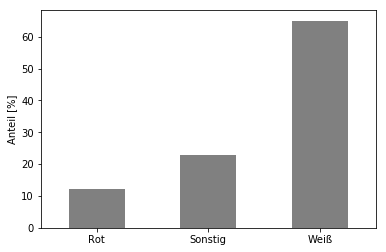

In [27]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [28]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

s       24
bg      24
g       22
         6
bg s     3
g s      3
br       2
s s      2
s bg     2
g bg     2
dtype: int64

### Oberfläche der Scherben

In [29]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%MKA%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
außen glatt,1,1.265823
außen: glatt/innen: leicht rau,1,1.265823
außen: glatt/innen: rau,1,1.265823
glatt,71,89.873418
glatt/poliert,1,1.265823
leicht rau,3,3.797468
rau,1,1.265823


In [30]:
a = pd.Series({'glatt':len(df.loc[df['Obfl'].str.contains("glatt")].index),
               'nicht glatt':len(df.loc[~df['Obfl'].str.contains("glatt")].index)})
a = pd.DataFrame(a)

a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
glatt,75,94.936709
nicht glatt,4,5.063291


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


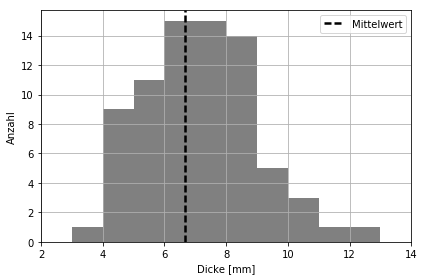

In [76]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%MKA%')
           AND (t_Obj.Wandung) < '15')""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [78]:
df['Wandung'].describe()

count    75.000000
mean      6.666667
std       1.876838
min       3.000000
25%       5.000000
50%       7.000000
75%       8.000000
max      13.000000
Name: Wandung, dtype: float64

In [79]:
df['Wandung'].var()

3.522522522522523

In [92]:
sql = """SELECT
           t_Obj.Wandung,
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%MKA%')
           AND ((t_Obj.Wandung) > '15')
           AND ((t_Obj.Wandung) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='right')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Wandung,Typ,Form_Gef,Form_Rand,Form_Boden
0,NaN,NaN,JEK,87/501,NaN,5,24,MKA,F3,B1.5,None
1,NaN,NaN,BOO,87/101,NaN,2,28,MKA,None,B1.5,None


## Gefäßformen

In [94]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKA%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [95]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [96]:
df_pivot['objID'].sum()

41

In [97]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,19,46.341463
sicher,22,53.658537


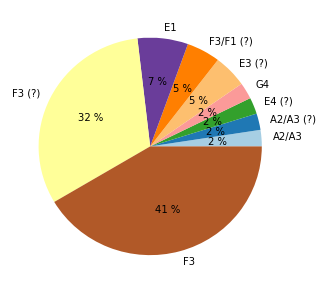

In [98]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [99]:
a = pd.Series({'G1-Schalen':len(df.loc[df['Form_Gef'].str.contains("F3")].index),
               'Rest':len(df.loc[~df['Form_Gef'].str.contains("F3")].index)})
a = pd.DataFrame(a)

a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
G1-Schalen,32,78.04878
Rest,9,21.95122


## Proportionen

In [101]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKA%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

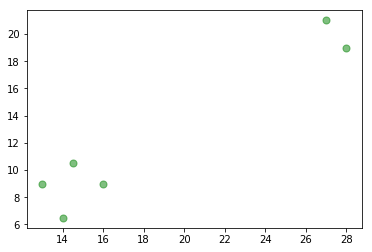

In [102]:
plt.scatter(df['maxD'], df['muendungsH'], alpha=0.5, c = 'g', s = 50, label = 'Weitere')

In [103]:
df.pivot_table(values = ['muendungsD', 'muendungsH', 'maxD'], index = 'Form_Gef', aggfunc = [np.min, np.max])

amin                        amax                      
           maxD muendungsD muendungsH  maxD muendungsD muendungsH
Form_Gef                                                         
A2/A3       NaN        6.0        NaN   NaN        6.0        NaN
A2/A3 (?)   NaN        7.0        NaN   NaN        7.0        NaN
E1         13.0       17.0        9.0  27.0       27.5       21.0
E3 (?)     16.0        NaN        NaN  22.0        NaN        NaN
E4 (?)     20.0       23.0        NaN  20.0       23.0        NaN
F3         11.0       13.0        6.5  32.0       36.0       19.0
F3 (?)     20.0       25.0        NaN  20.0       50.0        NaN
F3/F1 (?)  20.0        NaN        NaN  20.0        NaN        NaN
G4         34.0       33.0        NaN  34.0       33.0        NaN

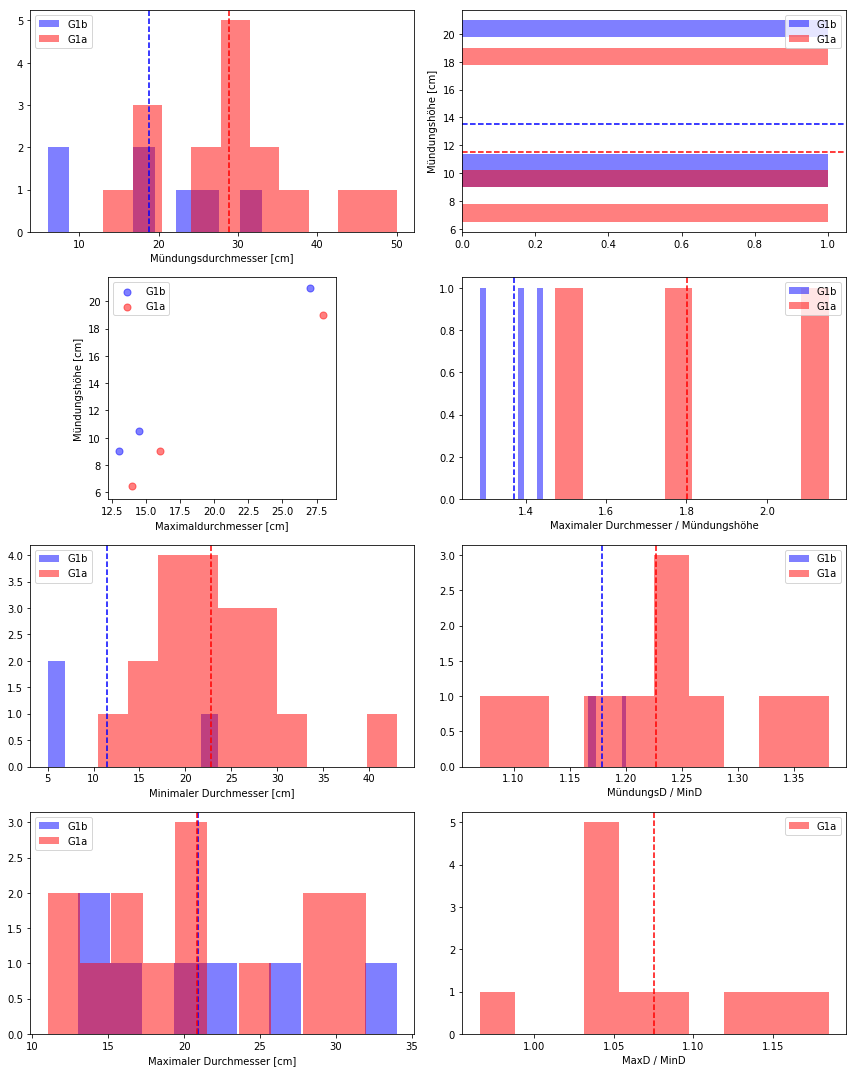

In [104]:
# ==>> eigentlich großer Müll das ganze
# einfach nur Tabelle mit Min Max je Gef-Form

a = df.loc[df['Form_Gef'].str.contains("F3")]   # G1a-Schalen
b = df.loc[~df['Form_Gef'].str.contains("F3")]   # G1b-Schalen

fig = plt.figure(1)
fig.set_size_inches(12,15)

ax = plt.subplot(421)

b['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5)
a['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G1a', alpha = 0.5)

plt.axvline(b['muendungsD'].mean(), color='b', linestyle = '--')
plt.axvline(a['muendungsD'].mean(), color='r', linestyle = '--')

plt.xlabel("Mündungsdurchmesser [cm]")

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

ax = plt.subplot(422)

b['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5, orientation='horizontal')
a['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G1a', alpha = 0.5, orientation='horizontal')

plt.axhline(b['muendungsH'].mean(), color='b', linestyle = '--')
plt.axhline(a['muendungsH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['muendungsH'].hist(histtype='stepfilled', orientation='horizontal')
plt.ylabel("Mündungshöhe [cm]")

ax = plt.subplot(423)

plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'b', s = 50, label = 'G1b')
plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'r', s = 50, label = 'G1a')#
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

#ax.plot([0, 10,20,30],[0, 10,20,30], color='black', linestyle = '--')
#ax.text(25.5, 23, '1:1', color='black', fontsize=15)

#ax.plot([0, 10,20,30],[0, 5,10,15], color='black', linestyle = '--')
#ax.text(25.5, 10, '2:1', color='black', fontsize=15)

#plt.xlim(0,30) 
#plt.ylim(0,30) 

ax.set_aspect('equal')

ax = plt.subplot(424)

# c['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5)
a['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G1a', alpha = 0.5)

plt.axvline(b['maxD-muendH'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD-muendH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['maxD-muendH'].hist(histtype='stepfilled', fc='#CCCCCC')
plt.xlabel("Maximaler Durchmesser / Mündungshöhe")

ax = plt.subplot(425)

b['minD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5)
a['minD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G1a', alpha = 0.5)

plt.axvline(b['minD'].mean(), color='b', linestyle = '--')
plt.axvline(a['minD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

#df['minD'].hist(histtype='stepfilled', fc='#86B404')
plt.xlabel("Minimaler Durchmesser [cm]")

ax = plt.subplot(426)

b['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5)
a['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G1a', alpha = 0.5)

plt.axvline(b['muend-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['muend-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

#df['muend-min'].hist(histtype='stepfilled', fc='#E1F5A9')
#plt.axvline(df['muend-min'].mean(), color='r', linestyle = '--')
# plt.legend(["Mittelwert"])
plt.xlabel("MündungsD / MinD")

ax = plt.subplot(427)

b['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5)
a['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G1a', alpha = 0.5)

plt.axvline(b['maxD'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

# df['maxD'].hist(histtype='stepfilled', fc='#2E64FE')
plt.xlabel("Maximaler Durchmesser [cm]")

ax = plt.subplot(428)

#b['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5)
a['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G1a', alpha = 0.5)

#plt.axvline(b['max-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['max-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

# df['max-min'].hist(histtype='stepfilled', fc='#81BEF7')
# plt.axvline(df['max-min'].mean(), color='r', linestyle = '--')
plt.legend(["Mittelwert"])
plt.legend(loc = 1)
plt.xlabel("MaxD / MinD")

plt.tight_layout()

# plt.savefig('../output/figs/3-1-2-1_Pikunda-Munda_Keramik-Abmessungen.pdf', bbox_inches='tight')
plt.show()

In [105]:
a.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,16.000000,3.000000,19.000000,9.000000,14.000000,12.000000,9.0,3.000000,10.000000,11.000000
mean,28.906250,11.500000,22.736842,8.777778,20.821429,3.083333,1.0,1.801769,1.227163,1.075187
std,9.956939,6.614378,6.980864,4.388274,6.758491,1.904938,3.0,0.340715,0.091384,0.061542
min,13.000000,6.500000,10.500000,3.500000,11.000000,0.500000,0.0,1.473684,1.069767,0.965517
25%,23.500000,7.750000,19.000000,4.500000,16.000000,1.750000,0.0,1.625731,1.179310,1.050125
50%,29.500000,9.000000,21.000000,9.000000,20.000000,3.000000,0.0,1.777778,1.234432,1.052632
75%,32.500000,14.000000,26.500000,11.000000,27.250000,4.000000,0.0,1.965812,1.262500,1.106643
max,50.000000,19.000000,43.000000,17.000000,32.000000,7.000000,9.0,2.153846,1.380952,1.185185


In [107]:
b.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,7.000000,3.000000,3.000000,1.0,7.000000,5.000000,5.000000,3.000000,3.000000,1.000000
mean,18.714286,13.500000,11.500000,17.0,20.928571,3.700000,2.400000,1.370370,1.178960,1.148936
std,10.024375,6.538348,10.404326,NaN,7.507932,2.841654,3.361547,0.079892,0.018307,NaN
min,6.000000,9.000000,5.000000,17.0,13.000000,1.500000,0.000000,1.285714,1.166667,1.148936
25%,12.000000,9.750000,5.500000,17.0,15.250000,2.000000,0.000000,1.333333,1.168440,1.148936
50%,17.500000,10.500000,6.000000,17.0,20.000000,2.500000,0.000000,1.380952,1.170213,1.148936
75%,25.250000,15.750000,14.750000,17.0,24.500000,4.000000,5.000000,1.412698,1.185106,1.148936
max,33.000000,21.000000,23.500000,17.0,34.000000,8.500000,7.000000,1.444444,1.200000,1.148936


## Bauchform

In [44]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKA%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [45]:
a = pd.Series({'Bauchknick':len(df.loc[df['Form_Bauch'].str.contains("D1")].index), 
               'konkaves Oberteil':len(df.loc[df['Form_Bauch'].str.contains("C1")].index),
               'Rest':len(df.loc[~df['Form_Bauch'].str.contains("C1|D1")].index)})
a = pd.DataFrame(a)

a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Bauchknick,10,33.333333
Rest,5,16.666667
konkaves Oberteil,15,50.000000


In [46]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
C1,8,33.333333
C1/D1,4,16.666667
A1,3,12.500000
C1/leicht/D1,2,8.333333
D1,2,8.333333
D2,2,8.333333
B1/D1,1,4.166667
B1/ausbiegend/D1,1,4.166667
C1 (?),1,4.166667


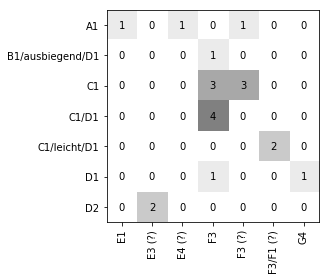

In [47]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

## Mündungs- und Randformen

In [113]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKA%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [114]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M5,39,67.241379
M2,8,13.793103
M3,4,6.896552
M1/M2,1,1.724138
M2 (?),1,1.724138
M2/M5,1,1.724138
M3/M5,1,1.724138
M4,1,1.724138
M5/M1,1,1.724138


In [115]:
df_pivot['objID'].sum()

58

In [111]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1.5,52,77.611940
B1,6,8.955224
B1.5 (?),3,4.477612
B2,2,2.985075
A1,1,1.492537


In [112]:
df_pivot['objID'].sum()

67

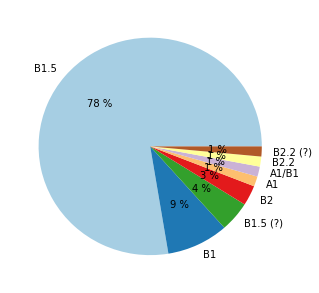

In [51]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

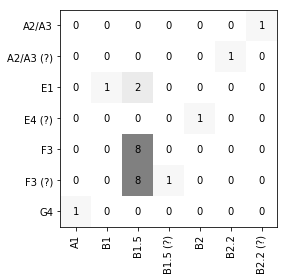

In [52]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

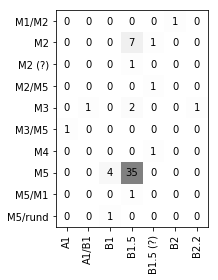

In [53]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

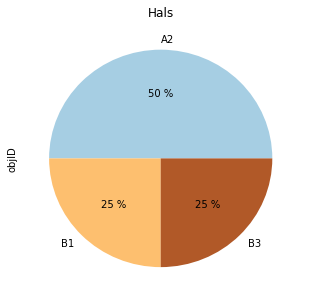

In [54]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

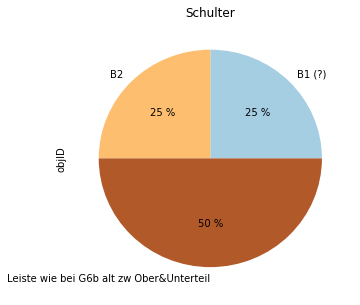

In [55]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Bodenformen

In [56]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKA%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
Form_Boden,,
B1,15,88.235294
B2,2,11.764706


In [57]:
len(df['Form_Boden'])

17

## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


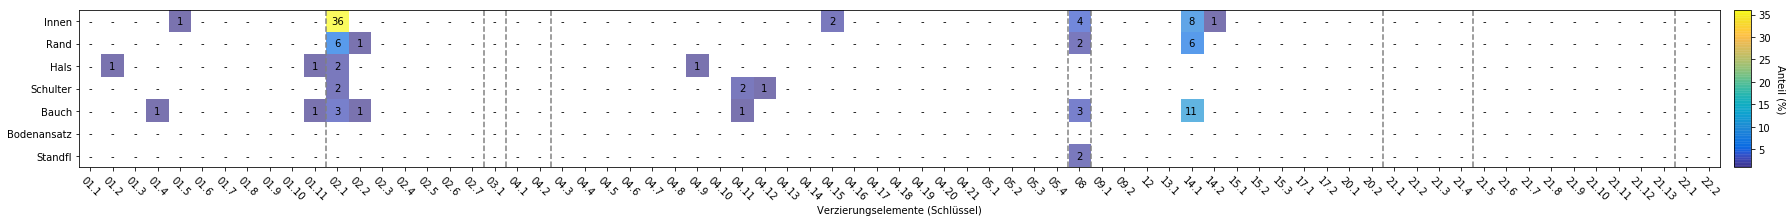

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-11_Mobaka_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [60]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%MKA%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [61]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

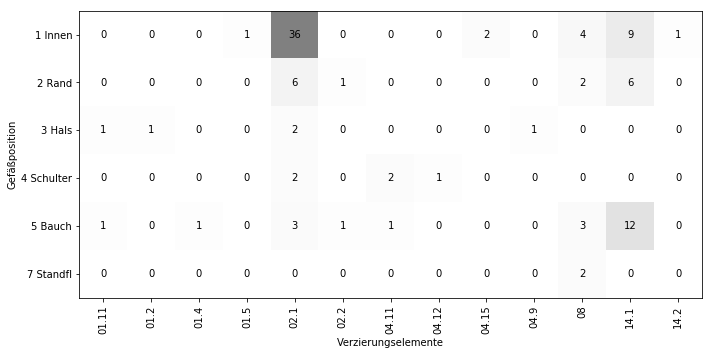

In [62]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
# plt.savefig('output/3-1-1-6_Bobulu_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [63]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


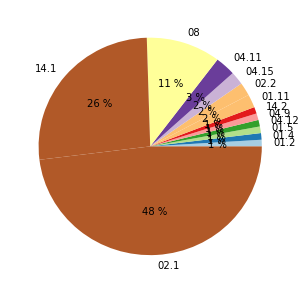

In [64]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')
#plt.title('Mokelo-Gruppe\nGefäßformen')
#plt.savefig('output/3-1-1-3_Mokelo-Gr_GefForm2.pdf')

In [65]:
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,objID,Prozent
verzName,,
02.1,49,48.039216
14.1,27,26.470588
08,11,10.784314
04.11,3,2.941176
01.11,2,1.960784


In [66]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,53,51.960784
2 Rand,15,14.705882
3 Hals,5,4.901961
4 Schulter,5,4.901961
5 Bauch,22,21.568627
7 Standfl,2,1.960784


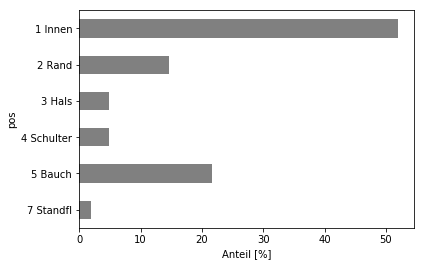

In [67]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

## Verbreitung

In [2]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
7,Gombe (Fpl. 237),237,17.580406,-0.704069,MKA (?)
13,Sosolo (Fpl. 241),241,17.128605,-0.892241,MKA
11,Monjolomba (Fpl. 243),243,17.174576,-0.684421,MKA
3,Bondo-Mission (Fpl. 245),245,17.166283,-0.400786,MKA
10,Mobaka (Fpl. 246),246,17.134569,-0.366609,MKA
8,Loboko (Fpl. 248),248,17.130913,-0.109189,MKA
8,Ikelemba (Fpl. 260),260,16.504824,1.227166,MKA (?)
14,Matoto (Fpl. 264),264,16.431282,1.281643,MKA (?)
12,Ngombe (Fpl. 283),283,17.192417,-0.849508,MKA
2,Boleko (Fpl. 285),285,17.221926,-0.805556,MKA


In [3]:
df.to_csv("../data/processed/3-1-2-11_MKA_Verbreitung.csv", index = False)

In [4]:
len(df)

21

## Appendix

### Fragmentierung der Stücke in Yumba (Fpl. 289) -- von dort stammen die meisten Funde

In [71]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKA%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Ort.ort_kurz) = 'YUM'))""".replace('\n',' ')
df = pd.read_sql(sql, con)
#display(df.head())

In [72]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Gr_Clist', aggfunc = np.sum)
#df_pivot['B'] = 0.
custom_dict = {'30':0, 70:1, 120:3,200:4,'>200':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
#df_pivot

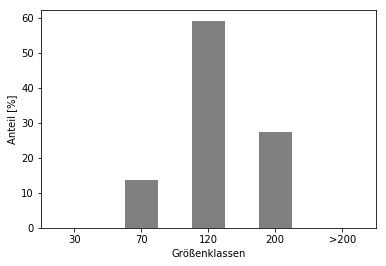

In [73]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anteil [%]')
plt.show()

In [74]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot

Scherbe
B     5
G     2
R    17
W     2
Name: Anzahl, dtype: int64

## Tafeln

In [75]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,37,9,SSL,87/101,NaN,32,MKA,F3 (?),B1.5,None
1,37,10,SSL,87/101,NaN,8,MKA,None,B1.5,None
2,39,4,MKA,87/101,NaN,1,MKA,None,B1.5,None
3,39,4,MKA,87/101,NaN,1,MKA,F3,B1.5,B1
4,59,3,IKM,87/101,NaN,21,MKA (?),None,B1.5,None
5,60,5,MAT,87/101,NaN,1,MKA (?),None,B1,None
6,68,4,BLK,87/1,GE 3,2,EPE/MKA (?),E1,B1,B1
7,69,8,BLK,87/101,NaN,85,MKA,F3 (?),None,None
8,72,1,ILL,87/101,NaN,1,MKA (?),None,A1/B1,None
9,72,5,MIS,87/101,NaN,3,MKA (?),E4 (?),B2,None
